In [1]:
pip install alpha_vantage pandas


Note: you may need to restart the kernel to use updated packages.


In [2]:
from alpha_vantage.timeseries import TimeSeries


from pprint import pprint

from datetime import date
from datetime import timedelta

import matplotlib.pyplot as plt 
import sys
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Ridge
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import math
from sklearn.metrics import r2_score
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
import time
from tensorflow import keras
import numpy as np
from matplotlib import pyplot

from sklearn.preprocessing import MinMaxScaler




In [3]:
# Obtaining stock data from alpha vantage 
sym='AAPL'


# funtion to obtain data from alpha vantage API
def stock_data(sym, date_of_data):
    
    ts = TimeSeries(key='SUXOFAIGXM6HEP9Y', output_format='pandas')
    data, meta_data = ts.get_daily_adjusted(symbol=sym, outputsize='full')
    data_date_changed = data[:date_of_data]
    data_date_changed['Ticker']= sym
    data_date_changed.sort_index(ascending=True, inplace=True)
    return data_date_changed

In [4]:
# Function to plot interactive plots using Plotly Express
def interactive_plot(df, title):
  fig = px.line(title = title)
  for i in df.columns[1:]:
    fig.add_scatter(x = df['date'], y = df[i], name = i)
  fig.show()

In [5]:
data_dated= stock_data(sym,'2015-01-01')

<ipython-input-3-9246448bf5ba>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_date_changed['Ticker']= sym
<ipython-input-3-9246448bf5ba>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_date_changed.sort_index(ascending=True, inplace=True)


In [6]:
data_dated.head(10)

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient,Ticker
date,,,,,,,,,
2015-01-02,111.39,111.44,107.350,109.33,24.859222,53204626.0,0.0,1.0,AAPL
2015-01-05,108.29,108.65,105.410,106.25,24.158898,64285491.0,0.0,1.0,AAPL
2015-01-06,106.54,107.43,104.630,106.26,24.161172,65797116.0,0.0,1.0,AAPL
2015-01-07,107.20,108.20,106.695,107.75,24.499965,40105934.0,0.0,1.0,AAPL
2015-01-08,109.23,112.15,108.700,111.89,25.441309,59364547.0,0.0,1.0,AAPL
2015-01-09,112.67,113.25,110.210,112.01,25.468595,53315099.0,0.0,1.0,AAPL
2015-01-12,112.60,112.63,108.800,109.25,24.841032,49650790.0,0.0,1.0,AAPL
2015-01-13,111.43,112.80,108.910,110.22,25.061588,67091928.0,0.0,1.0,AAPL
2015-01-14,109.04,110.49,108.500,109.80,24.966090,48956588.0,0.0,1.0,AAPL


In [7]:
# Check if Null values exist in stock prices data
data_dated.isnull().sum()

1. open                 0
2. high                 0
3. low                  0
4. close                0
5. adjusted close       0
6. volume               0
7. dividend amount      0
8. split coefficient    0
Ticker                  0
dtype: int64

In [8]:
# Get stock prices dataframe info
data_dated.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1588 entries, 2015-01-02 to 2021-04-23
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   1. open               1588 non-null   float64
 1   2. high               1588 non-null   float64
 2   3. low                1588 non-null   float64
 3   4. close              1588 non-null   float64
 4   5. adjusted close     1588 non-null   float64
 5   6. volume             1588 non-null   float64
 6   7. dividend amount    1588 non-null   float64
 7   8. split coefficient  1588 non-null   float64
 8   Ticker                1588 non-null   object 
dtypes: float64(8), object(1)
memory usage: 124.1+ KB


In [9]:
data_dated.describe()

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
count,1588.000000,1588.000000,1588.000000,1588.000000,1588.000000,1.588000e+03,1588.000000,1588.000000
mean,169.887790,171.660048,168.219414,170.036914,50.668025,4.511842e+07,0.009698,1.001889
std,71.557604,72.603837,70.750587,71.832716,30.633295,3.384776e+07,0.079270,0.075283
min,90.000000,91.670000,89.470000,90.340000,21.131248,1.136204e+07,0.000000,1.000000
25%,117.616250,118.824250,116.430000,117.437500,28.152342,2.527166e+07,0.000000,1.000000
50%,150.715000,152.885000,149.425000,150.740000,41.097019,3.365841e+07,0.000000,1.000000
75%,196.692500,199.320000,194.332500,197.045000,55.275137,5.036141e+07,0.000000,1.000000
max,514.790000,515.140000,500.330000,506.090000,142.945728,3.326072e+08,0.820000,4.000000


Text(0.5, 1.0, 'Multi-Collinearity of Car Attributes')

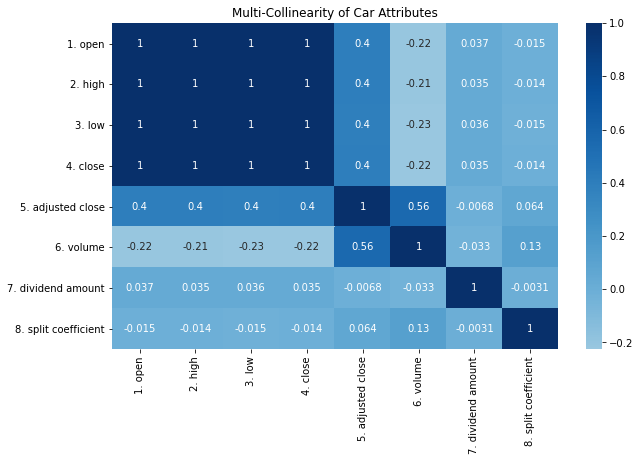

In [10]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(data_dated.corr(), center=0, cmap='Blues' , annot=True)
ax.set_title('Multi-Collinearity of Car Attributes')

In [11]:
# calculate the number of days that have elapsed in chosen time 
time_elapsed = (data_dated.index[-1] - data_dated.index[0]).days

In [12]:
print(time_elapsed)

2303


In [13]:
#Current price / first record (e.g. price at beginning of 2009)

#provides us with the total growth %

total_growth = (data_dated['5. adjusted close'][-1] / data_dated['5. adjusted close'][1])

#Next, I want to annualize this percentage

#First, I convert our time elapsed to the # of years elapsed

number_of_years = time_elapsed / 365.0
#Second, I can raise the total growth to the inverse of the # of years

#(e.g. ~1/10 at time of writing) to annualize our growth rate

cagr = total_growth ** (1/number_of_years) - 1


#Now that we have the mean annual growth rate above,

#we'll also need to calculate the standard deviation of the

#daily price changes

std_dev = data_dated['5. adjusted close'].pct_change().std()



#Next, because there are roughy ~252 trading days in a year,

#we'll need to scale this by an annualization factor

#reference: https://www.fool.com/knowledge-center/how-to-calculate-annualized-volatility.aspx



number_of_trading_days = 252

std_dev = std_dev * math.sqrt(number_of_trading_days)



#From here, we have our two inputs needed to generate random

#values in our simulation

print ("cagr (mean returns) : ", str(round(cagr,4)))

print ("std_dev (standard deviation of return : )", str(round(std_dev,4)))

cagr (mean returns) :  0.3125
std_dev (standard deviation of return : ) 0.2971


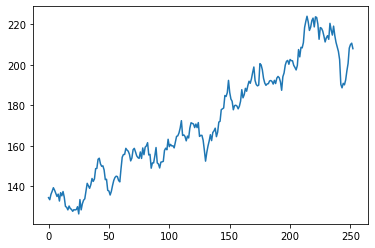

In [14]:
#Generate random values for 1 year's worth of trading (252 days),

#using numpy and assuming a normal distribution

daily_return_percentages = np.random.normal(cagr/number_of_trading_days, std_dev/math.sqrt(number_of_trading_days),number_of_trading_days)+1



#Now that we have created a random series of future

#daily return %s, we can simply apply these forward-looking

#to our last stock price in the window, effectively carrying forward

#a price prediction for the next year



#This distribution is known as a 'random walk'



price_series = [data_dated['5. adjusted close'][-1]]



for j in daily_return_percentages:

    price_series.append(price_series[-1] * j)



#Great, now we can plot of single 'random walk' of stock prices

plt.plot(price_series)

plt.show()

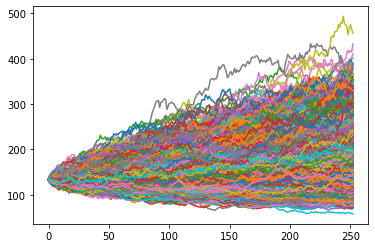

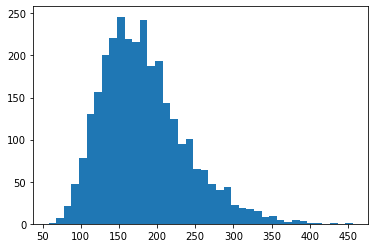

In [15]:
#Now that we've created a single random walk above,

#we can simulate this process over a large sample size to

#get a better sense of the true expected distribution

number_of_trials = 3000



#set up an additional array to collect all possible

#closing prices in last day of window.

#We can toss this into a histogram

#to get a clearer sense of possible outcomes

closing_prices = []



for i in range(number_of_trials):

    #calculate randomized return percentages following our normal distribution

    #and using the mean / std dev we calculated above

    daily_return_percentages = np.random.normal(cagr/number_of_trading_days, std_dev/math.sqrt(number_of_trading_days),

number_of_trading_days)+1

    price_series = [data_dated['5. adjusted close'][-1]]



    for j in daily_return_percentages:

        #extrapolate price out for next year

        price_series.append(price_series[-1] * j)



    #append closing prices in last day of window for histogram

    closing_prices.append(price_series[-1])



    #plot all random walks

    plt.plot(price_series)







plt.show()



#plot histogram



plt.hist(closing_prices,bins=40)



plt.show()

In [16]:
mean_end_price = round(np.mean(closing_prices),2)

print("Expected price: ", str(mean_end_price))

Expected price:  182.48


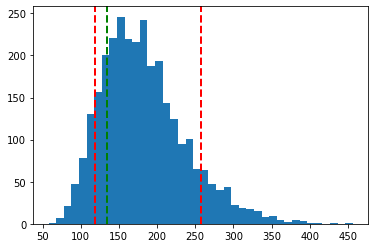

In [17]:
#lastly, we can split the distribution into percentiles

#to help us gauge risk vs. reward



#Pull top 10% of possible outcomes

top_ten = np.percentile(closing_prices,100-10)



#Pull bottom 10% of possible outcomes

bottom_ten = np.percentile(closing_prices,10);



#create histogram again

plt.hist(closing_prices,bins=40)

#append w/ top 10% line

plt.axvline(top_ten,color='r',linestyle='dashed',linewidth=2)

#append w/ bottom 10% line

plt.axvline(bottom_ten,color='r',linestyle='dashed',linewidth=2)

#append with current price

plt.axvline(data_dated['5. adjusted close'][-1],color='g', linestyle='dashed',linewidth=2)



plt.show()